## Sampling Experiments
1) Unifrom
2) Discrete Gaussian

For each distribution, we first check if the 'n' sampled values follow the same distribution or not usually by plotting frequency distribution graph. 
For discrete gaussian, other experiments are also performed for which the description is given in the subsequent sections.

In [9]:
import sys
sys.path.insert(0, '../')
import src.sampling as sampling
import src.utils as utils
import matplotlib.pyplot as plt

/Users/jenish/Library/CloudStorage/Dropbox/crypto/Lattice/lattice_code/tests/../src/utils.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vector)


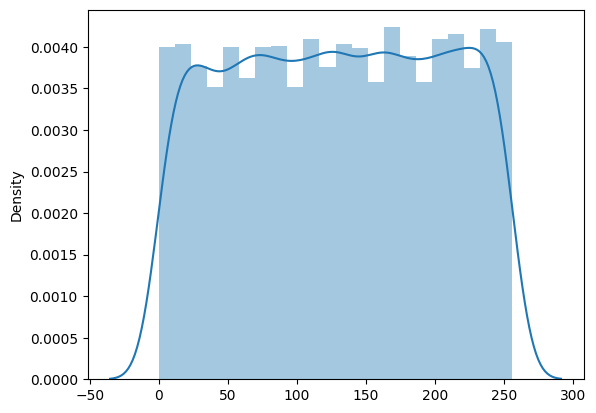

In [6]:
#-- Parameter for unifom distribution --
a, b = 0, 256
number_of_samples = 100000
#---------------------------------------

unif = sampling.Uniform(a,b)
output = unif.sample(10000)
utils.check_via_graph(output)

/Users/jenish/Library/CloudStorage/Dropbox/crypto/Lattice/lattice_code/tests/../src/utils.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vector)


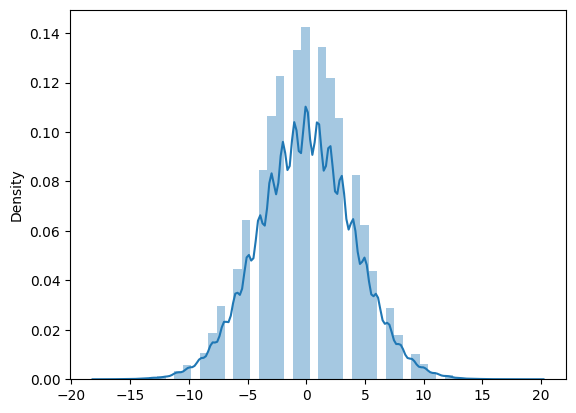

In [8]:
#-- Parameter for gaussian distribution --
center, sigma, tao = 0, 10, 3 ## tailcut is 3\sigma
number_of_samples = 100000
#---------------------------------------

gaus = sampling.DiscreteGaussian(center, sigma, tao)
output = gaus.sample(number_of_samples)
utils.check_via_graph(output)

## Running Experiments on Gaussian Distribution
1) Runtime of rejection sampling: Linear
but the number of samples is 

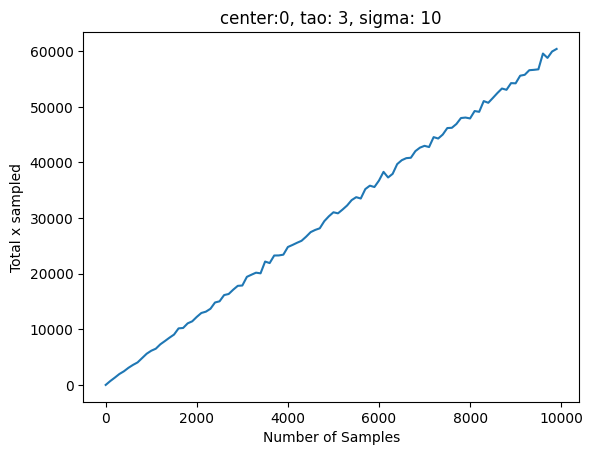

In [12]:
#-- Parameter for gaussian distribution --
center, sigma, tao = 0, 10, 3 ## tailcut is 3\sigma
number_of_samples = 10000
#---------------------------------------

gaus = sampling.DiscreteGaussian(center, sigma, tao)
def expected_samples(sampling_method:object):
	x = []
	y = []
	for i in range(0, number_of_samples, 100):
		l = sampling_method.sample(i)
		y.append(sampling_method.counter)
		x.append(i)
	plt.plot(x, y)
	plt.xlabel('Number of Samples')
	plt.ylabel('Total x sampled')
	plt.title(f'center:{sampling_method.t}, tao: {sampling_method.tao}, sigma: {sampling_method.sigma}')
	plt.show()

expected_samples(gaus)

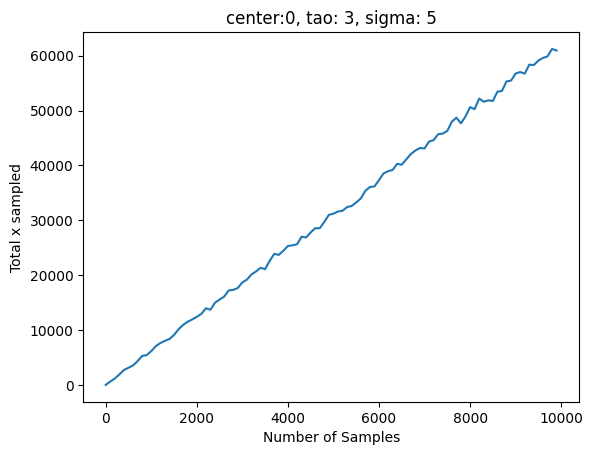

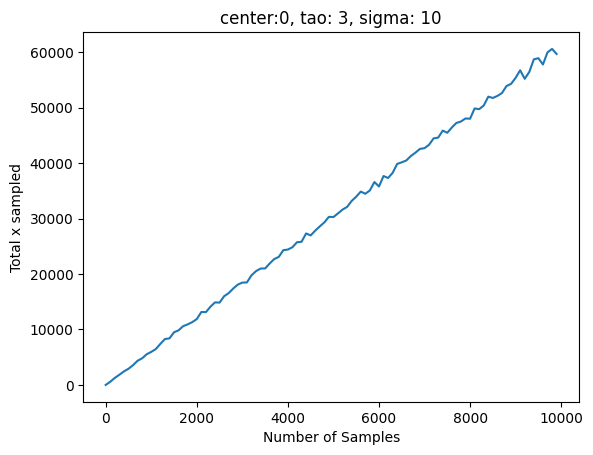

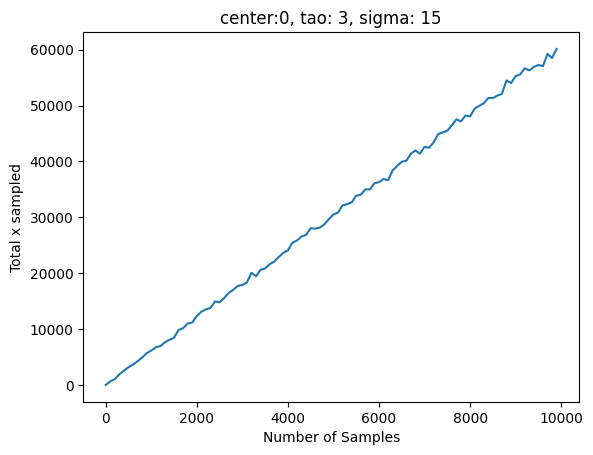

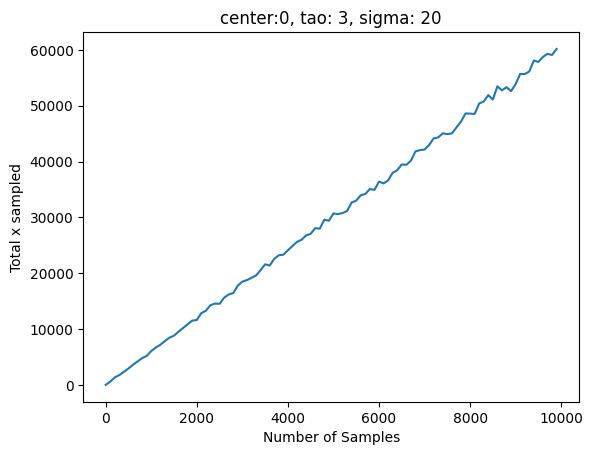

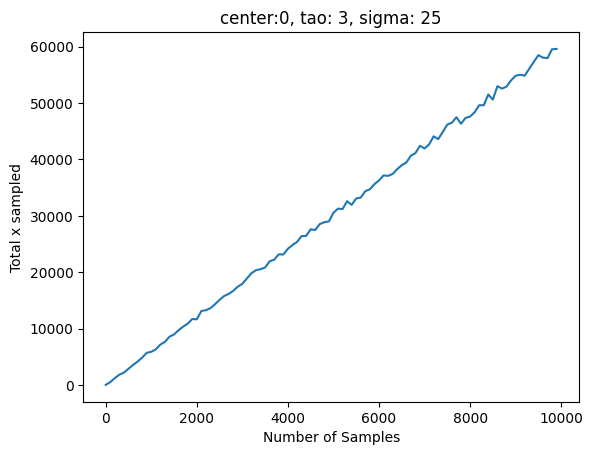

In [14]:
# varying sigma
center, tao = 0, 3
for sigma in range(5,30, 5):
	dist = sampling.DiscreteGaussian(center, sigma, tao)
	expected_samples(dist)